In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from dotmap import DotMap

In [5]:
PROJECT_PATH = '../'
DATA_DIR = "/home/swei20/AE/data/"
PCA_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/rbf/bosz_5000_full/pca/spectra.h5'
# NORM_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/rbf/bosz_5000_full/norm/spectra.h5'
NORM_PATH = "/scratch/ceph/szalay/swei20/AE/norm_flux.h5"
sys.path.insert(0, PROJECT_PATH)

In [6]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [7]:
import tensorflow as tf
# tf.enable_v2_behavior()
gpus = tf.config.list_physical_devices('GPU') 
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Load data

In [8]:
with h5py.File(NORM_PATH, 'r') as f:
    flux0 = f['flux'][()]
    para0 = f['para'][()]
#     mask = f['flux_idx'][()]
    wave0 = f['wave'][()]
#     eigv = f['flux_eigv'][()]

In [126]:
# with h5py.File(NORM_PATH, 'a') as f:
#     f.create_dataset("para", data=para, shape=para.shape)

In [18]:
# from lv.rpca import pcp, plot_pcp, plot_LS
from lv.rpca_alex import RPCA

### High T (6500K - 30000K) High W (8000A - 13000A)

In [77]:
fix_CO = 1
self = RPCA()
self.prepare_data(flux0, wave0, "H", "H", fix_CO, cleaned=0, para=para0, center=0, save=0)

CO==0: 31680
center 0 HH1 flux: 4266, wave: 4055


In [21]:
from scipy.sparse.linalg import svds

In [46]:
M = np.clip(-pHH0.flux, 0.0, None)

In [123]:
self.prepare_model()

lambda 10.0 | rate 0.15 | gs 0.210 | gl 40.50 | ep 100 | svd 50


In [165]:
R, S = self.init_pcp()

### EP = 1

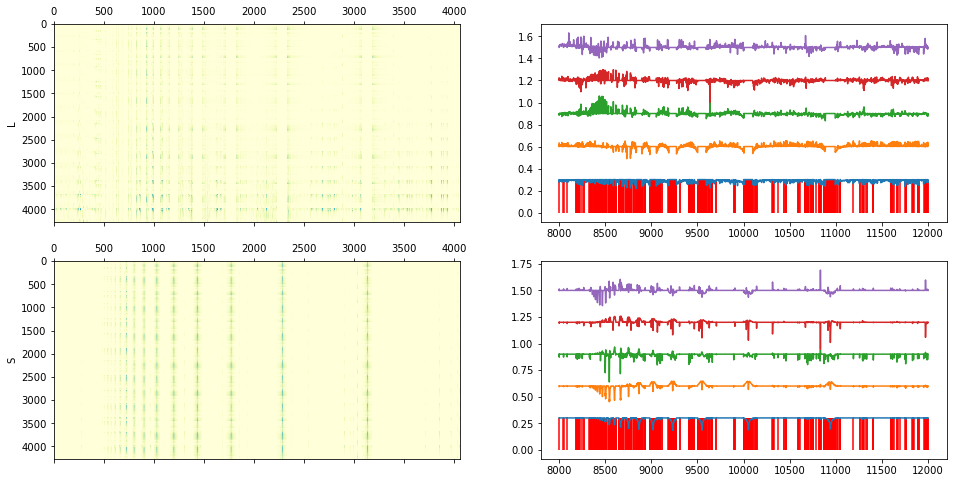

In [166]:
self.eval_LSM(M-S,S,self.mask)

In [167]:
self.gl, self.gs

(0.537584135594801, 0.024674135628440376)

In [168]:
L = self.update_L(self.X - S - R)

[27.88663982 13.82751792  7.34734911  5.40904006  4.48339389  3.30964731
  3.11108639  2.91942738  2.33335345  1.92772324  1.53420374  1.26107898
  1.13213182  1.01765594  0.94219967  0.86480849  0.75953353  0.70708308
  0.63693959  0.60841247  0.51906148  0.49569781  0.43910045  0.40924416
  0.38430133  0.33453805  0.3281161   0.2924271   0.28744715  0.26433578
  0.25673341  0.24236435  0.24053149  0.21638672  0.21231663  0.20397167
  0.19693306  0.17749748  0.16688533  0.16064436  0.15796496  0.15296809
  0.14602194  0.13831353  0.13390767  0.12558607  0.12171949  0.11715215
  0.11468316  0.11039882]
[27.34905568 13.28993379  6.80976497  4.87145592  3.94580976  2.77206318
  2.57350225  2.38184324  1.79576931  1.39013911]
L_20 

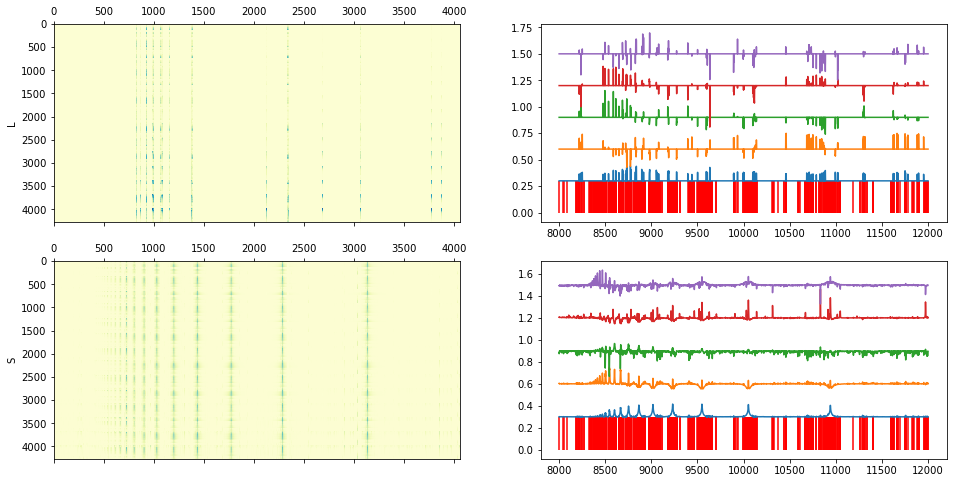

In [169]:
self.eval_LSM(L,M-L,self.mask)

In [170]:
S = self.update_S(self.X - L - R)

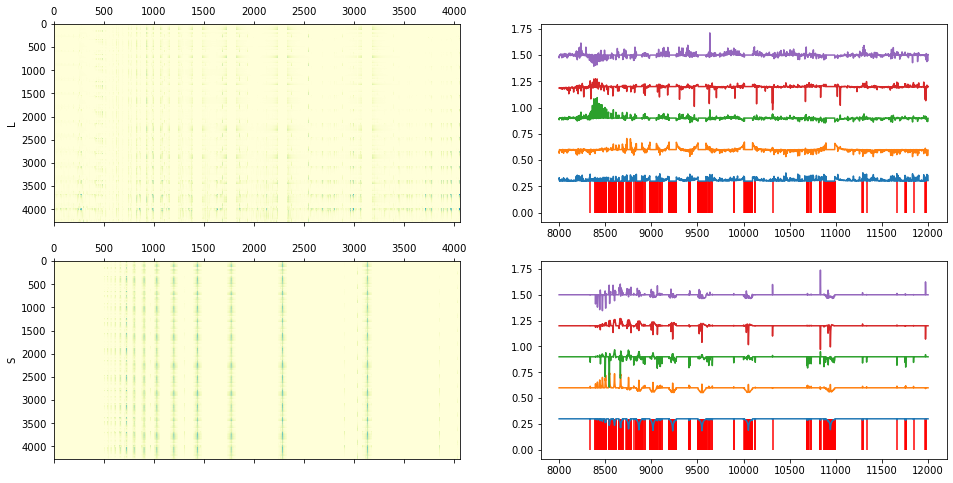

In [171]:
self.eval_LSM(M-S,S,self.mask)

In [172]:
R = self.X - S - L

In [173]:
self.loss(R)

0.1388815466523165

### EP = 2

In [175]:
L = self.update_L(self.X - S)

[33.18303315 16.66151514  9.22821374  7.34148031  6.03634438  4.33363263
  4.01695566  3.61651437  2.66287621  2.28877678  1.83227045  1.52398717
  1.37687946  1.2783068   1.04215246  0.99530923  0.86972156  0.85048328
  0.70319155  0.69236549  0.58827321  0.57520373  0.51953288  0.43548572
  0.42450423  0.3834639   0.37235748  0.36218712  0.34525967  0.32564135
  0.31732253  0.28917737  0.27551433  0.26249703  0.24263761  0.23155149
  0.22999215  0.21224212  0.19501752  0.17931624  0.17729553  0.17471497
  0.17020199  0.15811796  0.1507335   0.14466555  0.13765408  0.13426967
  0.13070147  0.12501341]
[32.64544901 16.12393101  8.6906296   6.80389617  5.49876024  3.7960485
  3.47937152  3.07893023  2.12529207  1.75119265]
L_22 

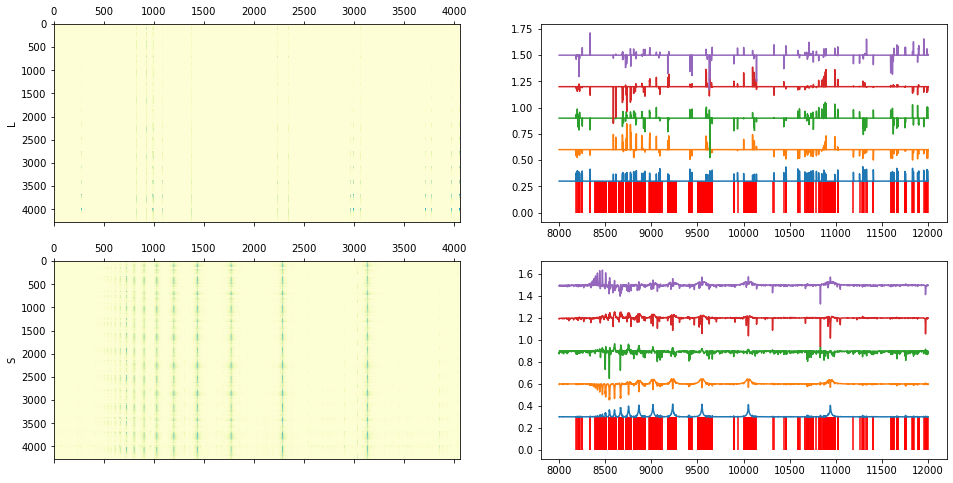

In [176]:
self.eval_LSM(L,M-L, self.mask)

In [177]:
S = self.update_S(self.X - L - R)

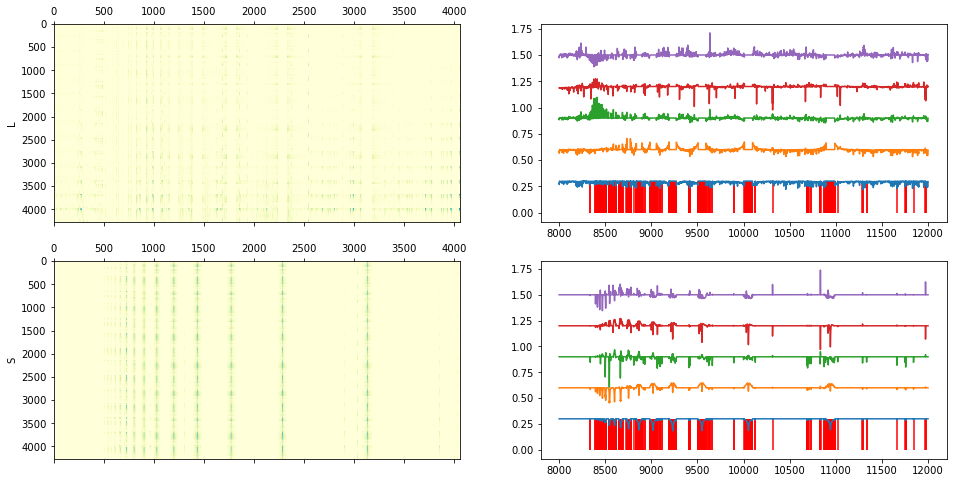

In [178]:
self.eval_LSM(M-S,S,self.mask)

In [179]:
R = self.X - S - L

In [180]:
self.loss(R)

0.13093506314505213

### EP = 3

In [181]:
L = self.update_L(self.X - S)

[32.88513597 16.57759499  9.12688574  7.30327442  6.01673629  4.2220004
  3.93098116  3.60518399  2.65516402  2.28072368  1.81727463  1.51363092
  1.37188591  1.26034735  1.03469519  0.99061016  0.86457542  0.84337289
  0.70059238  0.68671928  0.58606938  0.56848053  0.51717424  0.43296656
  0.42337695  0.38318311  0.3710948   0.36167392  0.34460677  0.32400277
  0.31687051  0.28836885  0.27451387  0.26075464  0.24142636  0.23016681
  0.22843625  0.2115801   0.19446533  0.17896766  0.17630071  0.1744116
  0.16980482  0.15768333  0.1492397   0.1436605   0.13725979  0.13344973
  0.13036432  0.12351081]
[32.34755183 16.04001085  8.5893016   6.76569029  5.47915215  3.68441626
  3.39339702  3.06759986  2.11757989  1.74313954]
L_22 

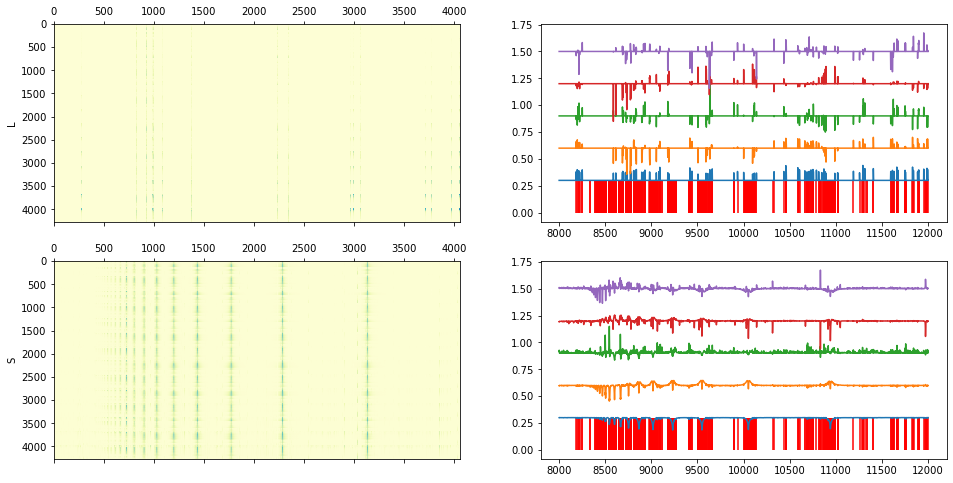

In [182]:
self.eval_LSM(L,M-L, self.mask)

In [183]:
S = self.update_S(self.X - L - R)

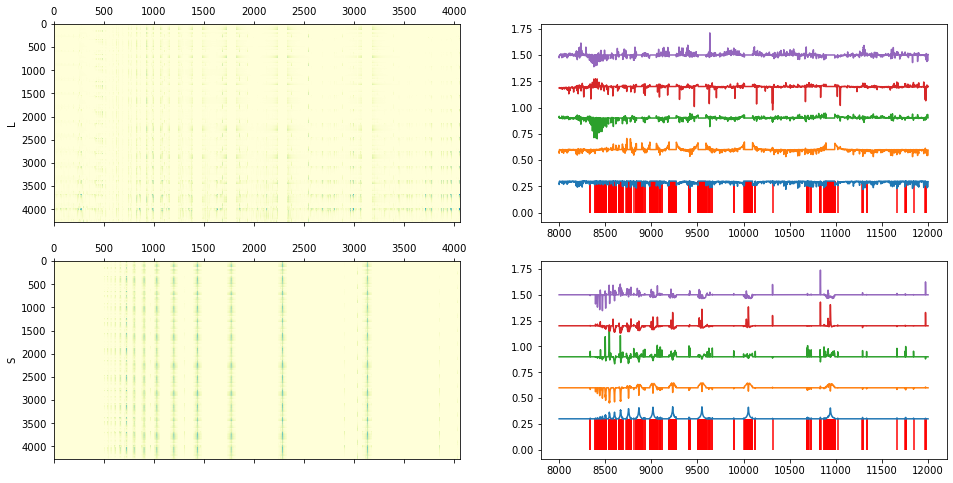

In [184]:
self.eval_LSM(M-S,S,self.mask)

In [185]:
R = self.X - S - L

In [186]:
self.loss(R)

0.12985120666754515

In [67]:
S = M - L

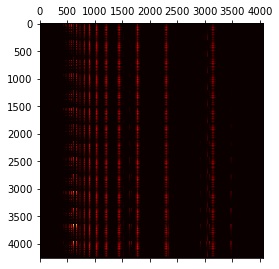

In [68]:
plt.matshow(S, cmap="hot")

In [49]:
L = M.copy()

In [50]:
L[:, mask] = 0.0

In [51]:
u, w, v = pHH0._svd(L, rank = 50)

In [56]:
M.mean()

0.02158261367303085

In [57]:
R = np.random.uniform(0.0, M.mean(), M.shape )

In [58]:
R

array([[0.00288906, 0.01575614, 0.01160051, ..., 0.00321788, 0.01911741,
        0.01497217],
       [0.01130501, 0.00197202, 0.00511004, ..., 0.01397909, 0.01554995,
        0.0157858 ],
       [0.01996423, 0.01618293, 0.0155549 , ..., 0.00247327, 0.00626374,
        0.00034343],
       ...,
       [0.02076153, 0.00295395, 0.00540227, ..., 0.00919515, 0.01573818,
        0.00287035],
       [0.01250207, 0.0157932 , 0.01266934, ..., 0.01586265, 0.0113779 ,
        0.00017682],
       [0.00067152, 0.02027361, 0.01836845, ..., 0.00424914, 0.01368968,
        0.00263591]])

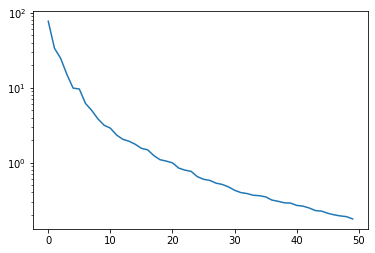

In [53]:
plt.plot(w)
plt.yscale("log")

In [59]:
vv = np.abs(v[:5]).sum(0)

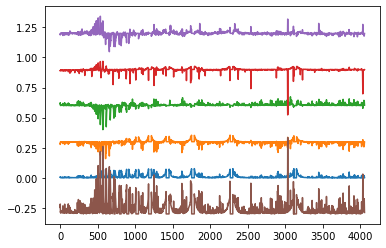

In [60]:
for i in range(5):
    plt.plot(v[i] + 0.3 * i)
plt.plot(vv - 0.3)

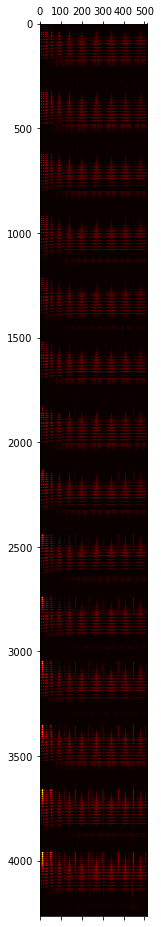

In [32]:
plt.matshow(M[:, mask],cmap="hot")

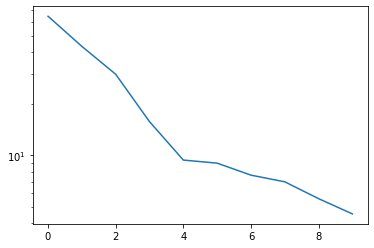

In [28]:
plt.plot(w)
plt.yscale("log")

In [231]:
v.shape

(100, 4055)

In [239]:
a = np.sum(v[:3], axis=0)

In [9]:
a = np.random.rand(5,3)

In [11]:
a

array([[0.24246508, 0.52842557, 0.93073199],
       [0.67564012, 0.13166471, 0.90256152],
       [0.10271317, 0.10444605, 0.3972192 ],
       [0.6820644 , 0.6565466 , 0.07186863],
       [0.81454552, 0.44984673, 0.17379985]])

In [10]:
mask = [True, False, True]

In [13]:
a = np.abs([-1,2,3,4,-4])

In [16]:
a

array([1, 2, 3, 4, 4])

In [15]:
np.maximum(a - 2, 0.0, out=a-2 )

UFuncTypeError: Cannot cast ufunc 'maximum' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

In [12]:
a[:, mask]

array([[0.24246508, 0.93073199],
       [0.67564012, 0.90256152],
       [0.10271317, 0.3972192 ],
       [0.6820644 , 0.07186863],
       [0.81454552, 0.17379985]])

In [243]:
np.quantile(a, 0.2)

0.001738857354384806

In [248]:
vv= v[0]

In [250]:
cut = np.quantile(v[0], 0.2)
vv[v[0] < cut] = 0
S = np.tile(vv, (M.shape[0], 1))

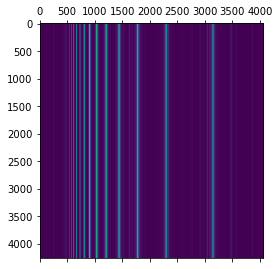

In [251]:
plt.matshow(S)

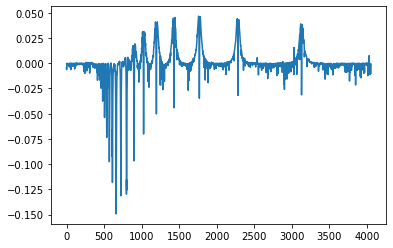

In [244]:
plt.plot(v[1])

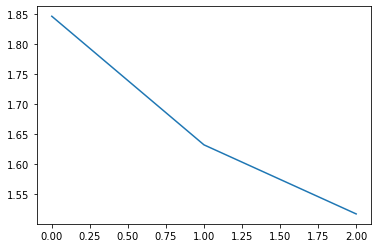

In [230]:
plt.plot(s[17:20])

In [204]:
M = np.clip(-pHH0.flux, 0.0, None)

In [273]:
L, S, (u, s, v) = pcp(M, delta=1e-5, lam =5000., mu=5.0, maxiter=100, verbose=1, S=None)

Iteration 0: error=6.439e-04, rank=50, nnz=0.1063
Iteration 1: error=1.899e-04, rank=38, nnz=0.1221
Iteration 2: error=1.839e-04, rank=31, nnz=0.1356
Iteration 3: error=1.755e-04, rank=28, nnz=0.1512
Iteration 4: error=1.681e-04, rank=25, nnz=0.1681
Iteration 5: error=1.604e-04, rank=22, nnz=0.1854
Iteration 6: error=1.559e-04, rank=21, nnz=0.2025
Iteration 7: error=1.490e-04, rank=19, nnz=0.2186
Iteration 8: error=1.422e-04, rank=18, nnz=0.2331
Iteration 9: error=1.345e-04, rank=17, nnz=0.2466
Iteration 10: error=1.266e-04, rank=15, nnz=0.2585
Iteration 11: error=1.176e-04, rank=15, nnz=0.2685
Iteration 12: error=1.170e-04, rank=15, nnz=0.2770
Iteration 13: error=1.124e-04, rank=14, nnz=0.2854
Iteration 14: error=1.105e-04, rank=14, nnz=0.2934
Iteration 15: error=1.097e-04, rank=13, nnz=0.3008
Iteration 16: error=1.056e-04, rank=12, nnz=0.3078
Iteration 17: error=1.050e-04, rank=12, nnz=0.3144
Iteration 18: error=1.054e-04, rank=12, nnz=0.3207
Iteration 19: error=9.825e-05, rank=11, n

Iteration 99: error=5.387e-05, rank=4, nnz=0.4361


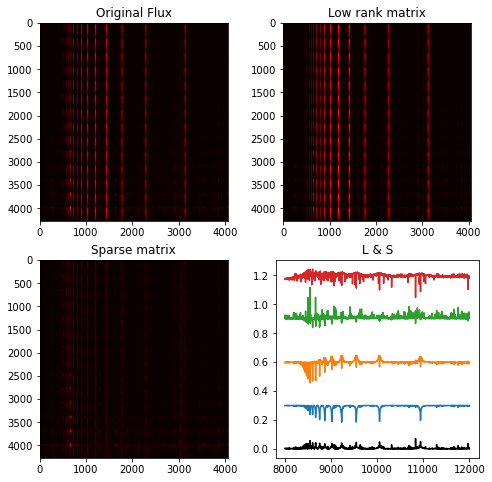

In [287]:
plot_pcp(M, L, S, u, s, v, pHH0.wave)

In [252]:
L, S, (u, s, v) = pcp(M, delta=1e-5, lam =100., mu=2.0, maxiter=100, verbose=1, S=None)

Iteration 0: error=7.024e-03, rank=33, nnz=0.0725
Iteration 1: error=3.717e-03, rank=27, nnz=0.1116
Iteration 2: error=2.639e-03, rank=22, nnz=0.1504
Iteration 3: error=2.112e-03, rank=21, nnz=0.1859
Iteration 4: error=1.817e-03, rank=18, nnz=0.2168
Iteration 5: error=1.575e-03, rank=17, nnz=0.2435
Iteration 6: error=1.398e-03, rank=16, nnz=0.2666
Iteration 7: error=1.271e-03, rank=16, nnz=0.2863
Iteration 8: error=1.175e-03, rank=14, nnz=0.3025
Iteration 9: error=1.077e-03, rank=14, nnz=0.3160
Iteration 10: error=1.007e-03, rank=13, nnz=0.3282
Iteration 11: error=9.320e-04, rank=13, nnz=0.3392
Iteration 12: error=8.693e-04, rank=12, nnz=0.3485
Iteration 13: error=8.219e-04, rank=12, nnz=0.3562
Iteration 14: error=7.742e-04, rank=11, nnz=0.3631
Iteration 15: error=7.263e-04, rank=11, nnz=0.3688
Iteration 16: error=6.904e-04, rank=11, nnz=0.3737
Iteration 17: error=6.608e-04, rank=11, nnz=0.3782
Iteration 18: error=6.368e-04, rank=11, nnz=0.3824
Iteration 19: error=6.155e-04, rank=11, n

Iteration 99: error=1.498e-04, rank=8, nnz=0.4855


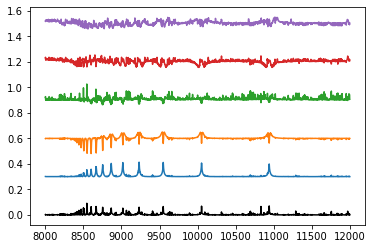

In [254]:
plot_LS(S,v,pHH0.wave)

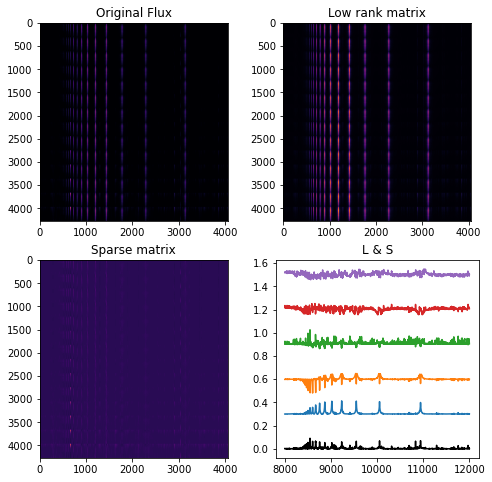

In [255]:
plot_pcp(M, L, S, u, s, v, pHH0.wave)

In [ ]:
plot_

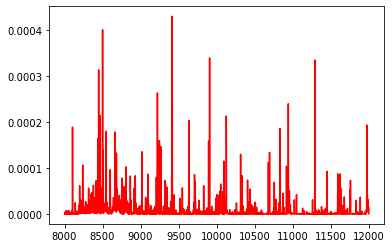

In [140]:
pHH0.plot_S(S=S)

In [129]:
from lv.rpca_B import RPCA

In [17]:
fix_CO = 1
ep=20
svd_tr = 40

### Low T (4000, 6500) Low W (3800A - 8000A)

In [18]:
pLL0 = RPCA()
pLL0.prepare_data(flux0, wave0, "L", "L", fix_CO, cleaned=0, para=para0, center=0, save=1)

CO==0: 31680
center 0 LL1 flux: 1638, wave: 7444


In [19]:
# pLL0.get_flux_stats()

In [20]:
pLL0.prepare_model(rate=0.01, ep=ep, la = 1.0, svd_tr=svd_tr)

lambda 1.0 | rate 0.01 | gs 0.080 | gl 14.00 | ep 20 | svd 40


In [21]:
pLL0.pcp()

|EP1_L_8 S_254 

   1	  220.9577	    8.9653	  836.0458	    8.7745	  92725.91
|EP2_L_12 |EP3_L_12 |EP4_L_10 |EP5_L_9 S_179 

   5	  239.3105	   11.5023	  159.7883	    6.8200	  61676.74
|EP6_L_8 S_100 

   6	  542.9150	   10.6065	  184.7582	    4.6966	  52011.72
|EP7_L_9 S_92 

   7	  409.8737	   10.3233	   88.2997	    2.6440	  25069.83
|EP8_L_11 |EP9_L_12 |EP10_L_12 |EP11_L_12 |EP12_L_12 |EP13_L_9 S_52 

  13	  320.5712	   11.7171	   97.6446	    2.0772	  32696.71
|EP14_L_11 |EP15_L_12 |EP16_L_13 |EP17_L_13 |EP18_L_12 |EP19_L_12 |EP20_L_11 t: 37.26
=================SAVINHG==================


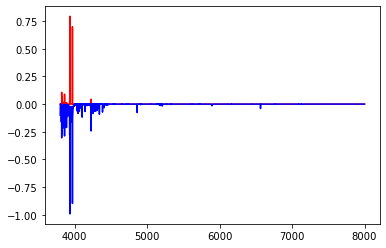

In [22]:
pLL0.plot_S()

### Low T (4000K - 6500K) High W (8000A - 13000A)

In [ ]:
pLH0 = RPCA()
pLH0.prepare_data(flux0, wave0, "L", "H", fix_CO, cleaned=0, para=para0, center=0, save=1)

In [ ]:
# pLH0.get_flux_stats()

In [ ]:
pLH0.prepare_model(rate=0.01, ep=ep, la = 1.0, svd_tr=svd_tr)

In [ ]:
pLH0.pcp()

In [ ]:
pLH0.plot_S()

In [ ]:
# g = "LH1"
# LOAD_PATH = f"../data/{g}.h5"
# with h5py.File(LOAD_PATH, 'r') as f:
#     S = f['S'][()]
# #     L = f['L'][()]
#     sdx = f['sdx'][()]
#     wave = f['wave'][()]
# pLH0.plot_S(wave, S)
# print(sdx)

### High T (6500K - 30000K) Low W (3800A - 8000A)

In [ ]:
pHL0 = RPCA()
pHL0.prepare_data(flux0, wave0, "H", "L", fix_CO, cleaned=0, para=para0, center=0, save=1)

In [ ]:
# pHL0.get_flux_stats()

In [ ]:
pHL0.prepare_model(rate=0.01, ep=ep, la = 1.0, svd_tr=svd_tr)

In [ ]:
pHL0.pcp()

In [ ]:
pHL0.plot_S()

### High T (6500K - 30000K) High W (8000A - 13000A)

In [288]:
pHH0 = RPCA()
pHH0.prepare_data(flux0, wave0, "H", "H", fix_CO, cleaned=0, para=para0, center=1, save=1)

CO==0: 31680
center 1 HH1 flux: 4266, wave: 4055


In [289]:
# pHH0.get_flux_stats()

In [290]:
pHH0.prepare_model(rate=0.0005, ep=20, la = 10.0, svd_tr=40)

lambda 10.0 | rate 0.0005 | gs 0.009 | gl 0.06 | ep 20 | svd 40


In [291]:
pHH0.pcp()

|EP1_L_18 S_7 |EP2_L_26 S_17 |EP3_L_32 S_19 |EP4_L_37 S_17 |EP5_L_40 S_7 |EP6_L_40 S_6 |EP7_L_40 S_6 |EP8_L_40 S_30 |EP9_L_40 S_5 |EP10_L_40 S_6 |EP11_L_40 S_6 |EP12_L_40 S_7 |EP13_L_40 S_8 |EP14_L_40 S_2 |EP15_L_40 S_1 |EP16_L_40 S_2 |EP17_L_40 S_4 |EP18_L_40 S_3 |EP19_L_40 S_3 |EP20_L_40 S_5 t: 47.29
=================SAVINHG==================


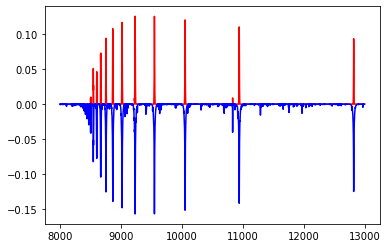

In [119]:
pHH0.plot_S()

In [120]:
len(pHH0.sdx) / pHH0.nw

0.03851699279093718

In [85]:
# pHH0.sdx

In [31]:
from scipy.sparse.linalg import svds

In [124]:
pHH0.L.shape

(4266, 4855)

In [121]:
u,s,v = svds(pHH0.L, k=5, tol=1e-4)


In [122]:
u, s, v = u[:,::-1], s[::-1], v[::-1, :]

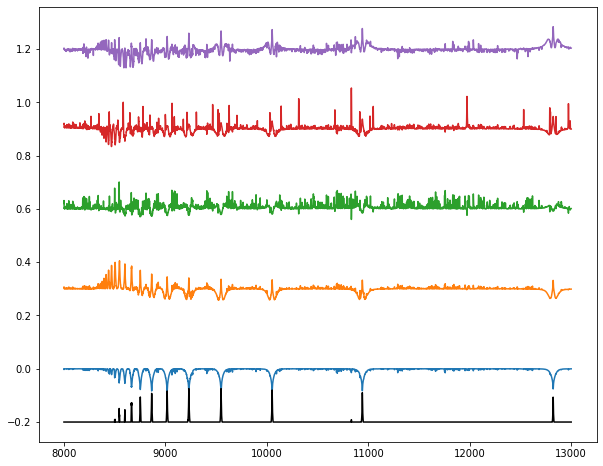

In [123]:
plt.figure(figsize=(10,8))
for i in range(5):
    plt.plot(pHH0.wave, v[i] + 0.3*i)
plt.plot(pHH0.wave, pHH0.SClp-0.2, c='k')

In [ ]:
from scipy.sparse.linalg import svds

In [ ]:
plt.plot

### Low T

In [367]:
flux_Lw0 = flux_Lw - np.mean(flux_Lw, axis=0)

In [369]:
np.abs(flux_Lw0).max()

7.827720882766534

In [368]:
np.linalg.norm(flux_Lw0, ord=2)

3175.4594595892286

In [ ]:
LT1=RPCA(flux_Lw0, wave_Lw, la=10.0, n_iter=100, ratio=0.0005)
LT1.pcp()

### High T

In [251]:
flux_Hw0 = flux_Hw - np.mean(flux_Hw, axis=0)

In [254]:
flux.shape

(116614, 15404)

In [255]:
flux_m = flux - np.mean(flux, axis=0)

In [257]:
np.linalg.norm(flux_Hw0, ord=2)

91.20171285773355

In [256]:
np.abs(flux_m).max()

9.816573223866719

In [ ]:
p1=RPCA(flux_Hw0, wave_Hw, la=10.0, n_iter=100, ratio=0.0005)
p1.pcp()

=====Initializing RPCA ======

iter	       res	     eps r	        dz	     eps U	      loss

=====Starting RPCA=====
|EP1_S_0 L_21

   1	   27.6553	    1.5612	    7.4932	    0.8817	     38.99
|EP2_S_309 L_31|EP3_S_339 L_36|EP4_S_350 L_46|EP5_S_345 L_56|EP6_S_294 L_60|EP7_S_85 L_58|EP8_S_477 L_58|EP9_S_100 L_50|EP10_S_191 L_50

  10	   43.3748	    2.1799	    2.7697	    0.8768	     67.37
|EP11_S_224 L_53|EP12_S_243 L_59|EP13_S_232 L_64|EP14_S_115 L_64|EP15_S_276 L_63|EP16_S_29 L_62|EP17_S_96 L_57|EP18_S_132 L_57|EP19_S_150 L_63|EP20_S_160 L_67

  20	    9.6249	    1.9096	    1.8191	    0.8498	     29.23
|EP21_S_138 L_70|EP22_S_26 L_70|EP23_S_102 L_71|EP24_S_34 L_66|EP25_S_66 L_63|EP26_S_86 L_64|EP27_S_98 L_69|EP28_S_93 L_72|EP29_S_43 L_72|EP30_S_36 L_73

  30	   19.4659	    1.8658	    0.4659	    0.8243	     12.73
|EP31_S_15 L_72|EP32_S_35 L_68|EP33_S_45 L_69|EP34_S_53 L_72|EP35_S_57 L_75|EP36_S_47 L_75|EP37_S_13 L_75|EP38_S_12 L_76|EP39_S_20 L_75|EP40_S_29 L_72

  40	   13.5845	    2.0151

In [ ]:
p2=RPCA(flux_Hw0, wave_Hw, la=5.0, n_iter=100, ratio=0.0005)
p2.pcp()

In [ ]:
p3=RPCA(flux_Hw0, wave_Hw, la=1.0, n_iter=100, ratio=0.0005)
p3.pcp()

In [279]:
p1.wave=wave_Hw

In [272]:
p4=RPCA(flux_Hw0, wave_Hw, la=10.0, n_iter=100, ratio=0.005)
p4.pcp()

L_29|EP37_S_17 L_29|EP38_S_20 L_29|EP39_S_23 L_30|EP40_S_25 L_30

  40	   11.7468	    1.9118	    2.0367	    0.8705	    132.33
|EP41_S_23 L_30|EP42_S_21 L_30|EP43_S_21 L_30|EP44_S_19 L_31|EP45_S_16 L_31|EP46_S_18 L_31|EP47_S_23 L_30|EP48_S_28 L_29|EP49_S_24 L_31|EP50_S_20 L_31

  50	    5.0030	    2.0042	    1.6540	    0.8684	    143.46
|EP51_S_19 L_31|EP52_S_19 L_31|EP53_S_21 L_31|EP54_S_24 L_31|EP55_S_23 L_31|EP56_S_23 L_31|EP57_S_22 L_31|EP58_S_20 L_30|EP59_S_20 L_31|EP60_S_20 L_32

  60	    6.6110	    2.0957	    1.1653	    0.8659	    148.55
|EP61_S_19 L_32|EP62_S_20 L_32|EP63_S_21 L_32|EP64_S_23 L_32|EP65_S_21 L_32|EP66_S_19 L_32|EP67_S_17 L_32|EP68_S_20 L_32|EP69_S_22 L_32|EP70_S_23 L_32

  70	    9.8997	    2.1538	    0.6722	    0.8651	    151.06
|EP71_S_21 L_33|EP72_S_20 L_33|EP73_S_21 L_33|EP74_S_21 L_33|EP75_S_20 L_33|EP76_S_20 L_33|EP77_S_22 L_33|EP78_S_23 L_32|EP79_S_24 L_31|EP80_S_22 L_32

  80	   11.2110	    2.1771	    0.2842	    0.8660	    152.61
|EP81_S_20 L_33|EP82_S_20 

In [316]:
p2.la=5

In [317]:
p3.la=1

In [306]:
for ii,self in enumerate([p1,p2,p3,p4]): 
    self.clp=0.2
    self.SSum = np.mean(np.abs(self.S), axis=0)
    self.SMax = np.max(self.SSum)
    self.SClp = np.clip(self.SSum, self.SMax * self.clp, self.SMax)

In [308]:
self.SClp

array([0.00330328, 0.00330328, 0.00330328, ..., 0.00330328, 0.00330328,
       0.00330328])

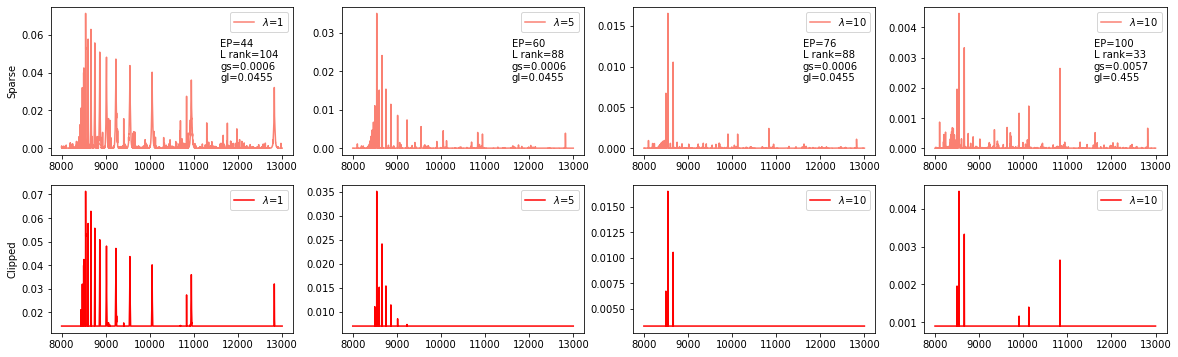

In [355]:
f, axs = plt.subplots(2,4, figsize=(20,6), sharex="row",)
for ii, self in enumerate([p3,p2,p1,p4]):
    axs[0, ii].plot(self.wave, np.mean(np.abs(self.S), axis=0), c="salmon", label = f"$\lambda$={int(self.la)}")
    axs[0, 0].set_ylabel("Sparse")
    axs[0, ii].legend()
    axs[1, ii].plot(self.wave,self.SClp, c="r", label = f"$\lambda$={int(self.la)}")
    axs[1, 0].set_ylabel("Clipped")
    axs[1, ii].legend()
    axs[0, ii].annotate(f'EP={self.h["ep"]+1}\nL rank={self.LRk}\ngs={self.gs:.4f}\ngl={self.gl}', xy=(0.7,0.5),xycoords='axes fraction',)

In [342]:
res = self.R + self.S + self.L - self.X

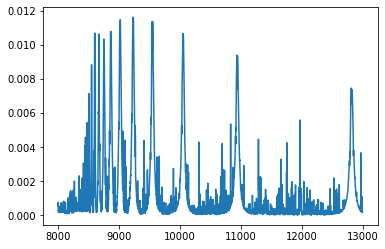

In [347]:
plt.plot(self.wave, np.mean(abs(res),axis=0) )

In [326]:
p4.L

33

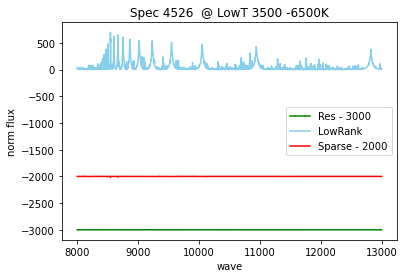

In [280]:
p4.eval_pcp()

In [275]:
p4.eval_pcp()

AttributeError: 'RPCA' object has no attribute 'wave'

In [420]:
a = np.array([1,3,4])
b = 2

In [427]:
cc = np.where(a > b)

In [428]:
cc

(array([1, 2]),)

In [426]:
np.nonzero(cc)[0]

array([1, 2])

In [ ]:
np

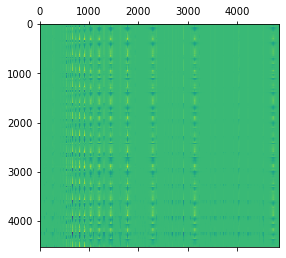

In [417]:
plt.matshow(p1.L)

### Explore SVD

In [372]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
TSVD_dim = 40
svd = TruncatedSVD(n_components=TSVD_dim).fit(X)
S = svd.singular_values_            # shape: (truncate,)
V = svd.components_.T  

In [63]:
from umap import UMAP

In [71]:
u  = UMAP(n_components=3).fit_transform(fluxaa)

In [74]:
u.shape

(1068, 3)

In [72]:
dfpp = dfpara.iloc[idxx]

In [76]:
for i in range(3):
    dfpp[f"u{i}"] = u[:,  i]

<ipython-input-76-fb6fe86d7154>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpp[f"u{i}"] = u[:,  i]


In [77]:
import  seaborn  as sns

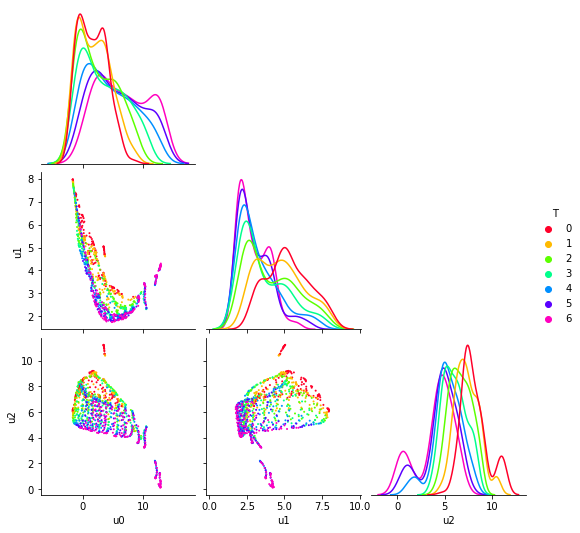

In [82]:
sns.pairplot(
            dfpp,
            x_vars=[f"u{i}" for i in range(3)],
            y_vars=[f"u{i}" for i in range(3)],
            hue="T",
            plot_kws=dict(marker="o", s=4, edgecolor="none"),
            diag_kws=dict(fill=False),
            palette="gist_rainbow",
            corner=True
        )

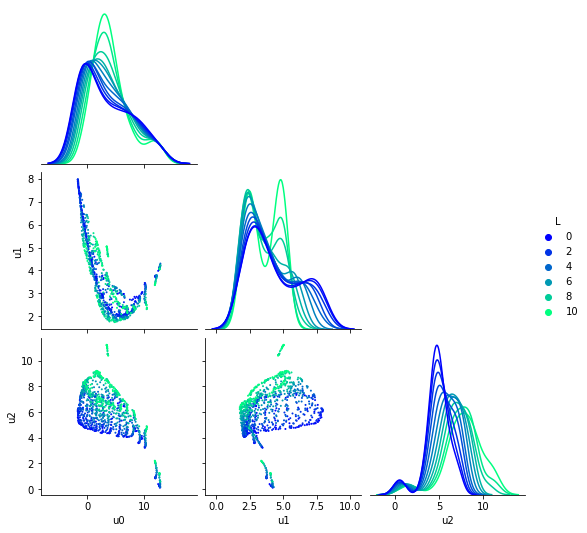

In [83]:
sns.pairplot(
            dfpp,
            x_vars=[f"u{i}" for i in range(3)],
            y_vars=[f"u{i}" for i in range(3)],
            hue="L",
            plot_kws=dict(marker="o", s=4, edgecolor="none"),
            diag_kws=dict(fill=False),
            palette="winter",
            corner=True
        )

In [54]:
from lv.rpca import RPCA
p=RPCA(fluxaa)
p.pcp()

=====Initializing RPCA ======


  0%|          | 0/100 [00:00<?, ?it/s]


iter	       res	     eps r	        dz	     eps U	      loss


  1%|          | 1/100 [00:10<17:11, 10.42s/it]

   1	  576.9295	    9.3612	  906.4700	    9.1100	 129324.50


 10%|█         | 10/100 [01:56<18:00, 12.01s/it]

  10	  176.0935	   12.1168	   96.0345	    8.5966	 400049.40


 20%|██        | 20/100 [04:13<19:52, 14.91s/it]

  20	   28.1348	   13.3625	   52.7014	    8.0026	 463614.19


 30%|███       | 30/100 [06:26<14:09, 12.13s/it]

  30	   21.6851	   13.6695	   19.8796	    7.4646	 458877.50


 36%|███▌      | 36/100 [07:19<13:01, 12.21s/it]

t: 439.61


In [108]:
meann=np.mean(fluxaa, axis=0)

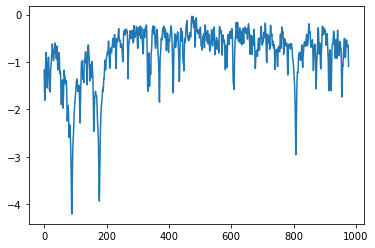

In [111]:
plt.plot(meann)

In [110]:
fluxaa.shape

(1068, 977)

In [109]:
meann.shape

(977,)

In [103]:
fluxaaa = fluxaa -  np.mean(fluxaa, axis=0)

In [185]:
# p10=RPCA(fluxaaa, la=10, ratio =0.005, n_iter=50)
# p10.pcp()

In [242]:
np.linalg.norm(flux_Hw, ord=2)

253.38692492414103

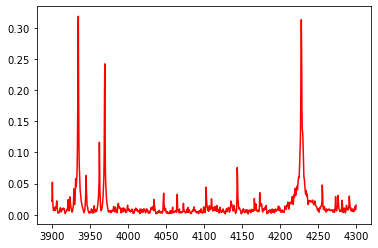

In [243]:
plt.plot(waveaa, np.mean(np.abs(p10.S), axis=0),c='r')

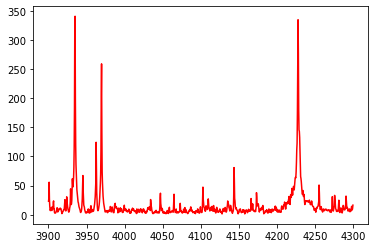

In [186]:
plt.plot(waveaa, np.sum(np.abs(p10.S), axis=0),c='r')

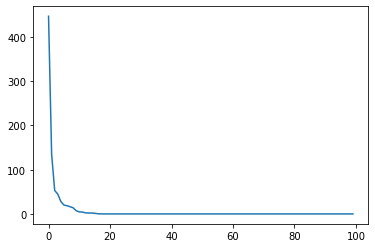

In [187]:
s  = np.linalg.svd(p.L,  compute_uv=0)
plt.plot(s[:100])

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
# plt.plot(waveaa, np.sum(np.abs(p10.S), axis=0),c='r')

In [116]:
p=RPCA(fluxaaa, ratio =0.005)
p.pcp()

=====Initializing RPCA ======


  0%|          | 0/100 [00:00<?, ?it/s]


iter	       res	     eps r	        dz	     eps U	      loss
(17,)


  1%|          | 1/100 [00:04<07:54,  4.79s/it]

   1	   61.2705	    3.2342	  305.7263	    3.1655	  10204.01
(22,)


  2%|▏         | 2/100 [00:08<06:41,  4.09s/it]

(22,)


  3%|▎         | 3/100 [00:12<06:31,  4.03s/it]

(19,)


  4%|▍         | 4/100 [00:17<06:56,  4.34s/it]

(14,)


  5%|▌         | 5/100 [00:21<07:02,  4.45s/it]

(11,)


  6%|▌         | 6/100 [00:25<06:39,  4.25s/it]

(10,)


  7%|▋         | 7/100 [00:29<06:23,  4.12s/it]

(13,)


  8%|▊         | 8/100 [00:33<06:22,  4.16s/it]

(15,)


  9%|▉         | 9/100 [00:38<06:38,  4.38s/it]

(14,)


 10%|█         | 10/100 [00:44<07:04,  4.72s/it]

  10	  156.5659	    5.4982	   36.8258	    0.6005	   8451.69
(12,)


 11%|█         | 11/100 [00:48<06:47,  4.57s/it]

(10,)


 12%|█▏        | 12/100 [00:51<06:06,  4.17s/it]

(9,)


 13%|█▎        | 13/100 [00:59<07:42,  5.32s/it]

(11,)


 14%|█▍        | 14/100 [01:06<08:24,  5.86s/it]

(13,)


 15%|█▌        | 15/100 [01:10<07:28,  5.28s/it]

(13,)


 16%|█▌        | 16/100 [01:16<07:30,  5.37s/it]

(13,)


 17%|█▋        | 17/100 [01:20<07:01,  5.07s/it]

(12,)


 18%|█▊        | 18/100 [01:24<06:31,  4.78s/it]

(11,)


 19%|█▉        | 19/100 [01:27<05:47,  4.29s/it]

(10,)


 20%|██        | 20/100 [01:30<05:05,  3.82s/it]

  20	   76.3937	    3.9684	   17.9735	    0.3638	   2509.26
(13,)


 21%|██        | 21/100 [01:32<04:22,  3.33s/it]

(14,)


 22%|██▏       | 22/100 [01:34<03:52,  2.97s/it]

(14,)


 23%|██▎       | 23/100 [01:37<03:32,  2.76s/it]

(13,)


 24%|██▍       | 24/100 [01:50<07:21,  5.81s/it]

(13,)


 25%|██▌       | 25/100 [01:52<06:01,  4.81s/it]

(12,)


 26%|██▌       | 26/100 [01:54<04:57,  4.02s/it]

(13,)


 27%|██▋       | 27/100 [01:58<04:37,  3.81s/it]

(15,)


 28%|██▊       | 28/100 [02:01<04:25,  3.69s/it]

(15,)


 29%|██▉       | 29/100 [02:04<04:09,  3.51s/it]

(15,)


 30%|███       | 30/100 [02:07<03:51,  3.30s/it]

  30	   37.5217	    4.6591	   10.0185	    0.4539	   3664.36
(15,)


 31%|███       | 31/100 [02:09<03:33,  3.09s/it]

(14,)


 32%|███▏      | 32/100 [02:13<03:38,  3.21s/it]

(14,)


 33%|███▎      | 33/100 [02:17<03:48,  3.41s/it]

(15,)


 34%|███▍      | 34/100 [02:21<03:50,  3.50s/it]

(15,)


 35%|███▌      | 35/100 [02:25<04:01,  3.72s/it]

(16,)


 36%|███▌      | 36/100 [02:28<03:42,  3.48s/it]

(15,)


 37%|███▋      | 37/100 [02:30<03:18,  3.15s/it]

(15,)


 38%|███▊      | 38/100 [02:33<03:16,  3.16s/it]

(15,)


 39%|███▉      | 39/100 [02:37<03:19,  3.27s/it]

(15,)


 40%|████      | 40/100 [02:40<03:11,  3.19s/it]

  40	   18.0591	    4.4634	    5.6334	    0.3965	   2574.91
(16,)


 41%|████      | 41/100 [02:43<03:10,  3.23s/it]

(16,)


 42%|████▏     | 42/100 [02:47<03:14,  3.35s/it]

(16,)


 43%|████▎     | 43/100 [02:51<03:24,  3.59s/it]

(16,)


 44%|████▍     | 44/100 [02:54<03:19,  3.56s/it]

(16,)


 45%|████▌     | 45/100 [02:57<03:04,  3.36s/it]

(16,)


 46%|████▌     | 46/100 [03:01<03:03,  3.40s/it]

(16,)


 47%|████▋     | 47/100 [03:04<03:04,  3.48s/it]

(16,)


 48%|████▊     | 48/100 [03:07<02:44,  3.17s/it]

(16,)


 49%|████▉     | 49/100 [03:10<02:37,  3.08s/it]

(17,)


 50%|█████     | 50/100 [03:14<02:44,  3.29s/it]

  50	    8.7706	    4.7009	    3.7540	    0.4186	   2812.28
(16,)


 51%|█████     | 51/100 [03:18<02:51,  3.50s/it]

(16,)


 52%|█████▏    | 52/100 [03:22<02:55,  3.66s/it]

(16,)


 53%|█████▎    | 53/100 [03:25<02:43,  3.47s/it]

(16,)


 54%|█████▍    | 54/100 [03:27<02:21,  3.08s/it]

(17,)


 55%|█████▌    | 55/100 [03:28<02:00,  2.67s/it]

(17,)


 56%|█████▌    | 56/100 [03:32<02:08,  2.92s/it]

(17,)


 57%|█████▋    | 57/100 [03:36<02:14,  3.12s/it]

(17,)


 58%|█████▊    | 58/100 [03:40<02:24,  3.45s/it]

(17,)


 59%|█████▉    | 59/100 [03:45<02:39,  3.90s/it]

(17,)


 60%|██████    | 60/100 [03:49<02:40,  4.01s/it]

  60	    4.2179	    4.7350	    2.6932	    0.4019	   2561.35
(17,)


 61%|██████    | 61/100 [03:53<02:31,  3.87s/it]

(17,)


 62%|██████▏   | 62/100 [03:55<02:11,  3.45s/it]

(17,)


 63%|██████▎   | 63/100 [04:00<02:26,  3.95s/it]

(17,)


 64%|██████▍   | 64/100 [04:04<02:25,  4.03s/it]

(17,)


 65%|██████▌   | 65/100 [04:08<02:19,  3.98s/it]

(17,)


 66%|██████▌   | 66/100 [04:12<02:16,  4.00s/it]

(17,)


 67%|██████▋   | 67/100 [04:16<02:12,  4.02s/it]

(17,)


 68%|██████▊   | 68/100 [04:19<01:58,  3.71s/it]

(17,)


 69%|██████▉   | 69/100 [04:22<01:48,  3.50s/it]

(17,)


 70%|███████   | 70/100 [04:26<01:48,  3.63s/it]

  70	    2.0590	    4.8407	    2.1114	    0.4082	   2588.40
(17,)


 71%|███████   | 71/100 [04:31<01:51,  3.83s/it]

(17,)


 72%|███████▏  | 72/100 [04:35<01:50,  3.96s/it]

(17,)


 73%|███████▎  | 73/100 [04:39<01:49,  4.06s/it]

(17,)


 74%|███████▍  | 74/100 [04:44<01:51,  4.27s/it]

(17,)


 75%|███████▌  | 75/100 [04:48<01:42,  4.09s/it]

(17,)


 76%|███████▌  | 76/100 [04:51<01:32,  3.86s/it]

(17,)


 77%|███████▋  | 77/100 [04:55<01:29,  3.89s/it]

(17,)


 78%|███████▊  | 78/100 [04:58<01:19,  3.59s/it]

(17,)


 79%|███████▉  | 79/100 [05:00<01:05,  3.14s/it]

(17,)


 80%|████████  | 80/100 [05:02<00:58,  2.92s/it]

  80	    1.0274	    4.8931	    1.6927	    0.4034	   2518.79
(17,)


 81%|████████  | 81/100 [05:05<00:52,  2.76s/it]

(17,)


 82%|████████▏ | 82/100 [05:07<00:49,  2.76s/it]

(17,)


 83%|████████▎ | 83/100 [05:11<00:52,  3.06s/it]

(17,)


 84%|████████▍ | 84/100 [05:14<00:48,  3.04s/it]

(17,)


 85%|████████▌ | 85/100 [05:18<00:47,  3.18s/it]

(17,)


 86%|████████▌ | 86/100 [05:21<00:45,  3.24s/it]

(17,)


 87%|████████▋ | 87/100 [05:25<00:46,  3.55s/it]

(17,)


 88%|████████▊ | 88/100 [05:29<00:43,  3.66s/it]

(17,)


 89%|████████▉ | 89/100 [05:33<00:40,  3.71s/it]

(18,)


 90%|█████████ | 90/100 [05:37<00:39,  3.90s/it]

  90	    0.5421	    4.9503	    1.3733	    0.4049	   2512.73
(18,)


 91%|█████████ | 91/100 [05:43<00:40,  4.48s/it]

(18,)


 92%|█████████▏| 92/100 [05:47<00:34,  4.26s/it]

(18,)


 93%|█████████▎| 93/100 [05:52<00:32,  4.59s/it]

(18,)


 94%|█████████▍| 94/100 [05:56<00:26,  4.42s/it]

(18,)


 95%|█████████▌| 95/100 [06:01<00:23,  4.62s/it]

(18,)


 96%|█████████▌| 96/100 [06:07<00:20,  5.04s/it]

(18,)


 97%|█████████▋| 97/100 [06:12<00:14,  4.96s/it]

(18,)


 98%|█████████▊| 98/100 [06:16<00:09,  4.76s/it]

(18,)


 99%|█████████▉| 99/100 [06:20<00:04,  4.47s/it]

(18,)


100%|██████████| 100/100 [06:25<00:00,  3.86s/it]

 100	    0.3144	    4.9886	    1.1228	    0.4034	   2490.26
t: 385.69


In [124]:
s =np.linalg.svd(p.L, compute_uv=0)

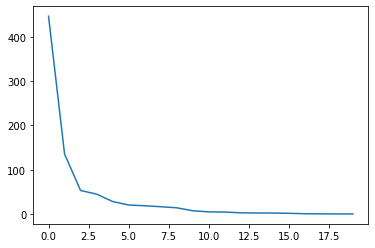

In [126]:
plt.plot(s[:20])

In [131]:
1068*977

1043436

In [130]:
p.S.shape

(1068, 977)

In [133]:
np.float(np.where(p.S>0.0)[0].shape) / 1068*977

<ipython-input-133-fa3270d42a3c>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.float(np.where(p.S>0.0)[0].shape) / 1068*977


TypeError: float() argument must be a string or a number, not 'tuple'

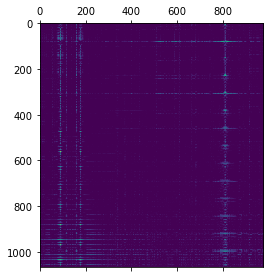

In [136]:
plt.matshow(np.abs(p.S), aspect="auto")

In [142]:
ss = np.sum(np.abs(p.S),  axis=0)

In [168]:
ssmax =np.max(ss)

In [144]:
ss_90=np.quantile(ss, 0.9)

In [166]:
ss10=np.where(ss>0.1* np.max(ss))[0]

In [167]:
len(ss10)

96

In [173]:
aaaa = np.where(ss>0.2* np.max(ss))[0]

In [175]:
len(aaaa) / 1000

0.041

In [171]:
ss2 = np.clip(ss, 0.2* ssmax,ssmax)

In [180]:
r = 0.2
ss = np.sum(np.abs(p.S),  axis=0)
ssmax = np.max(ss)
# plt.plot(np.clip(ss, r* ssmax,ssmax))
print(np.where(ss  >  r*ssmax)[0].shape)

(41,)


In [ ]:
for i

In [159]:
np.where( ss>0.1* np.max(ss)   fluxaa[:, aaaa].shape

(1068, 96)

In [163]:
np.sum(np.abs(fluxaa), 

array([[-0.48050364, -0.71498369, -0.88586536, ...,  0.        ,
         0.        , -0.54031616],
       [-0.62875286, -0.92126892, -1.12084027, ...,  0.        ,
         0.        , -0.63432637],
       [-0.77169389, -1.13406621, -1.37520948, ...,  0.        ,
         0.        , -0.69471888],
       ...,
       [-1.12826618, -1.70846649, -1.97506328, ...,  0.        ,
         0.        , -1.40260823],
       [-1.35390683, -1.87816941, -2.12933033, ...,  0.        ,
         0.        , -1.4401755 ],
       [-1.45610712, -1.91133675, -2.13577652, ...,  0.        ,
         0.        , -1.43676064]])

In [162]:
fluxaa[:, ~aaaa] =  0

In [ ]:
plt.plot

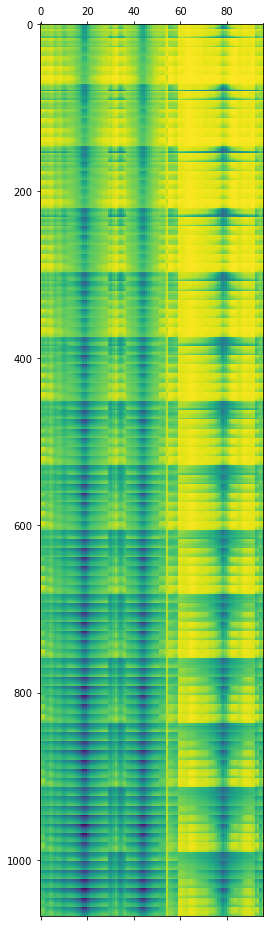

In [161]:
plt.matshow(fluxaa [:, aaaa],  aspect="auto")

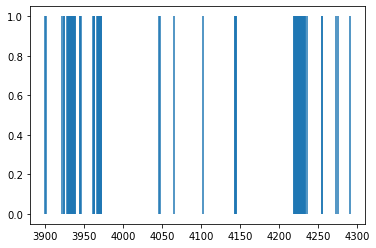

In [148]:
plt.vlines(waveaa[np.where(ss>ss_90)[0]], ymin=0,ymax=1)
plt.plot(waveaa, np.sum(np.abs(p.S), axis=0),c='r')

In [ ]:
ss>np.

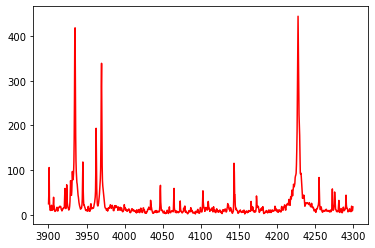

In [135]:
plt.plot(waveaa, np.sum(np.abs(p.S), axis=0),c='r')

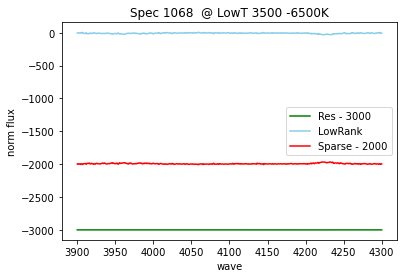

In [118]:
p.eval_pcp(waveaa)

In [106]:
s  = np.linalg.svd(fluxaaa,  compute_uv=0)

(0.0, 100.0)

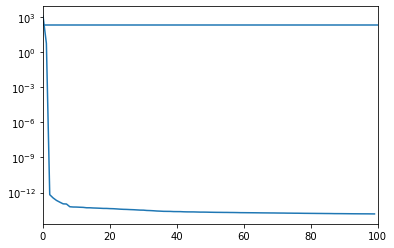

In [100]:
plt.plot(s[:100])
plt.hlines(p.gl, xmin=0, xmax=1000)
plt.yscale("log")
plt.xlim(0,100)

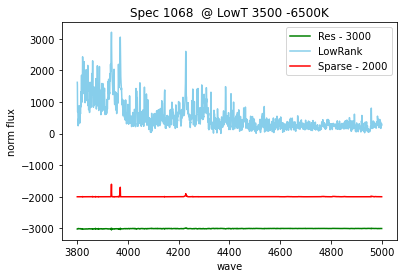

In [55]:
p.eval_pcp(waveaa)

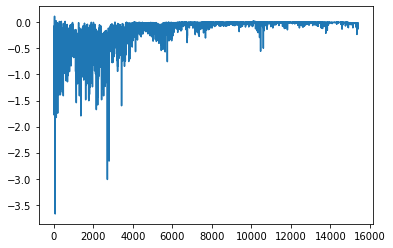

In [13]:
plt.plot(flux0[0])

### LOAD TRAINED DATA

In [8]:
DATA_PATH = "/home/swei20/LV/data/w8_95.h5"

In [9]:
with h5py.File(DATA_PATH, 'r') as f:
    flux = f['flux'][()]
    para = f['para'][()]
    wave = f['wave'][()]

In [10]:
SAVE_PATH = "/home/swei20/LV/data/w8_95_pca.h5"
with h5py.File(SAVE_PATH, 'r') as f:
    R = f['R'][()]
    S = f['S'][()]
    L = f['L'][()]

In [ ]:
eval_rpca(wave, R, S, L, flux, roff=3000, soff=2000)

In [11]:
def eval_rpca(wave, R, S, L, X, roff=3000, soff=2000):
    res = R + S + L - X
    plt.plot(wave, -res.sum(0)-roff, label=f"Res - {roff}", c='g')
    plt.plot(wave, -L.sum(0), label = "LowRank", c='skyblue')
    plt.plot(wave, -S.sum(0)-soff, label=f"Sparse - {soff}", c='r')
    plt.xlabel("wave")
    plt.ylabel("norm flux")
    plt.title(f"Spec {X.shape}  @ LowT 3500 -6500K")
    plt.legend()

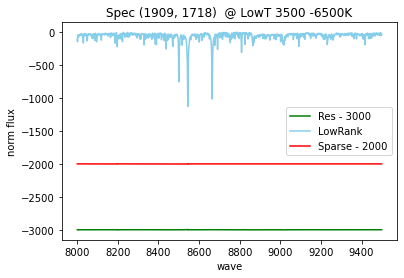

In [12]:
eval_rpca(wave, R, S, L, flux, roff=3000, soff=2000)

Robust PCA

In [51]:
def get_flux_in_Wrange(flux, wave, Ws):
    start = np.digitize(Ws[0], wave)
    end = np.digitize(Ws[1], wave)
    return flux[..., start:end], wave[start:end]

In [16]:
flux1, wave1 = get_flux_in_Wrange(flux0, wave, [3800, 13000])

In [95]:
flux2 = np.clip(-flux1, 0, None)

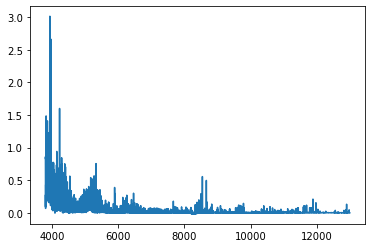

In [19]:
plt.plot(wave1, flux2[0])

In [20]:
m, n = flux2.shape

In [139]:
from lv.rpca_v1 import rpcaADMM

In [113]:
wave1

array([ 3800.3757,  3800.7556,  3801.1357, ..., 12996.7305, 12998.0312,
       12999.3311])

In [153]:
flux_test, wave_test = get_flux_in_Wrange(flux2, wave1, [4500, 9800])

In [ ]:
SAVE_PATH = "/home/swei20/LV/data/w45_98.h5"

In [ ]:
with h5py.File(SAVE_PATH, 'w') as f:
    f.create_dataset('flux', data = flux_3, shape=train_pc.shape)
    f.create_dataset('RBF_PATH', data = RBF_PATH)
    f.create_dataset('eigv', data = rbf.grid.eigv['flux'])
    f.create_dataset('eigs', data = rbf.grid.eigs['flux'])
    f.create_dataset('wave', data = rbf.wave)
    f.create_dataset('para', data = index)

In [218]:
flux_test00 = flux_test[id_test,:]

In [220]:
flux_test00.shape

(1936, 4105)

In [155]:
h = rpcaADMM(flux_test, parallel=0)

38432 4105


  0%|          | 0/100 [00:00<?, ?it/s]


iter	    r norm	   eps pri	    s norm	  eps dual	      loss


  1%|          | 1/100 [01:40<2:45:52, 100.53s/it]

   1	  909.3922	   13.4470	 1127.1486	   12.8851	 168794.49


 10%|█         | 10/100 [17:42<2:38:23, 105.59s/it]

  10	  644.8647	   32.0016	 1449.8649	   43.2563	6157486.89


 20%|██        | 20/100 [35:46<2:21:52, 106.40s/it]

  20	 1065.3002	   31.1385	 2281.2392	   39.2118	5097346.79


 30%|███       | 30/100 [54:05<2:06:10, 108.15s/it]

  30	  866.7198	   31.6257	 2178.5952	   39.0803	5225093.20


 40%|████      | 40/100 [1:12:10<1:47:34, 107.58s/it]

  40	 1046.0658	   29.9841	 1859.4397	   41.3952	5225881.72


 50%|█████     | 50/100 [1:29:47<1:26:43, 104.06s/it]

  50	  998.1770	   30.7322	 1222.1558	   39.2302	4915036.54


 60%|██████    | 60/100 [1:48:25<1:14:08, 111.21s/it]

  60	  986.2787	   31.3632	 2131.6012	   39.0172	5195744.54


 70%|███████   | 70/100 [2:06:05<51:31, 103.06s/it]  

  70	 1069.8794	   30.5555	 2169.3351	   40.5125	5266770.52


 80%|████████  | 80/100 [2:24:13<36:41, 110.06s/it]

  80	 1001.4897	   30.2592	 2328.5284	   39.9995	4939988.17


 90%|█████████ | 90/100 [2:42:23<18:03, 108.40s/it]

  90	 1359.0472	   30.1379	 2040.4084	   41.6295	5579852.60


100%|██████████| 100/100 [3:01:09<00:00, 108.70s/it]

 100	 1050.2166	   30.8375	 1571.8055	   41.6499	5737285.81


In [160]:
from lv.rpca_jkarnows import rpcaADMM

In [ ]:
h = rpcaADMM(flux_test, n_iter=10)


iter	    r norm	   eps pri	    s norm	  eps dual	 objective
   1	  726.6321	   13.1607	 1098.5192	   12.8851	 183509.39


In [204]:
h["addm_toc"]

98.17557144165039

In [171]:
from lv.rpca import RPCA

In [226]:
flux2.shape

(38432, 12299)

In [ ]:
flux_3, wave_3 = get_flux_in_Wrange(flux2, wave1, [4500, 9800])

In [ ]:
from lv.rpca import RPCA
pFull=RPCA(flux2)
pFull.pcp()

  0%|          | 0/100 [00:00<?, ?it/s]


iter	       res	     eps r	        dz	     eps U	      loss


In [ ]:
pFull

In [ ]:
eval_pcp(pFull, wave1, roff=800, soff=400)

In [221]:
X = flux_test00
p=RPCA(X)
p.pcp()

  0%|          | 0/100 [00:00<?, ?it/s]


iter	       res	     eps r	        dz	     eps U	      loss


  1%|          | 1/100 [00:15<25:05, 15.20s/it]

   1	  129.8678	    2.4751	  198.6813	    2.4264	   6190.52


 10%|█         | 10/100 [02:10<19:47, 13.20s/it]

  10	   31.5760	    3.1229	   23.2978	    2.6259	  26391.99


 20%|██        | 20/100 [04:42<19:46, 14.83s/it]

  20	   10.0627	    3.3769	    8.7963	    2.3103	  26727.24


 30%|███       | 30/100 [06:48<12:19, 10.57s/it]

  30	    4.6503	    3.3484	    3.0425	    2.2361	  25632.17


 31%|███       | 31/100 [07:20<16:19, 14.20s/it]

t: 440.27


In [223]:
def eval_pcp(self, wave, roff=3000, soff=2000):
    res = self.R + self.S + self.L - self.X
    plt.plot(wave, -res.sum(0)-roff, label=f"Res - {roff}", c='g')
    plt.plot(wave, -self.L.sum(0), label = "LowRank", c='skyblue')
    plt.plot(wave, -self.S.sum(0)-soff, label=f"Sparse - {soff}", c='r')
    plt.xlabel("wave")
    plt.ylabel("norm flux")
    plt.title(f"Spec {self.m}  @ LowT 3500 -6500K")
    plt.legend()

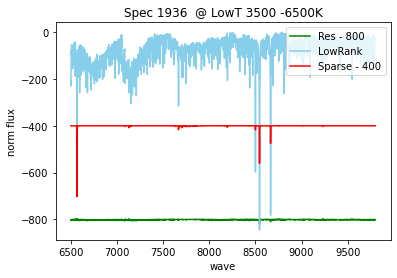

In [225]:
eval_pcp(p, wave_test, roff=800, soff=400)

In [211]:
def eval_pcp(p, wave):
    res = p.R + p.S + p.L - p.X
    plt.plot(wave, -res.sum(0)-3000, label="Res - 3k", c='g')
    plt.plot(wave, -p.L.sum(0), label = "LowRank", c='skyblue')
    plt.plot(wave, -p.S.sum(0)-2000, label="Sparse - 2k", c='r')
    plt.xlabel("wave")
    plt.ylabel("norm flux")
    plt.title(f"Spec {X.shape}  @ LowT 3500 -6500K")
    plt.legend()

In [214]:
p.S.shape

(1936, 1484)

In [194]:
para.iloc[idx]

F    13
T     0
L     5
C     3
O     3
Name: 35790, dtype: int64

In [ ]:
plt.plot

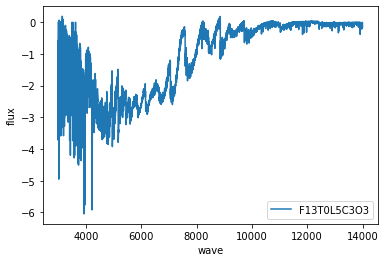

In [201]:
plt.plot(wave, flux0[idx], label = "F13T0L5C3O3")
plt.xlabel("wave")
plt.ylabel("flux")
plt.legend()

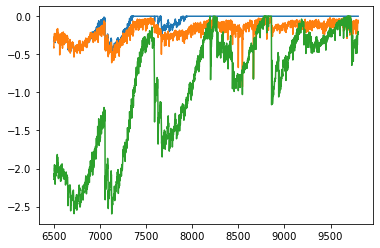

In [187]:
idx=35790
plt.plot(wave_test, -h["X2_admm"][idx], label='low Rank')
plt.plot(wave_test, -h["X3_admm"][idx])
plt.plot(wave_test, -flux_test[idx])

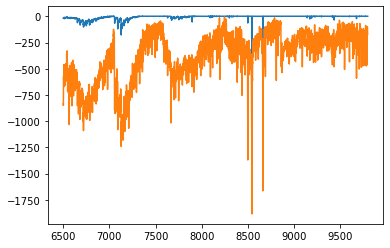

In [181]:
plt.plot(wave_test, 1-SS)
plt.plot(wave_test, 1-LL)

In [14]:
h

NameError: name 'h' is not defined

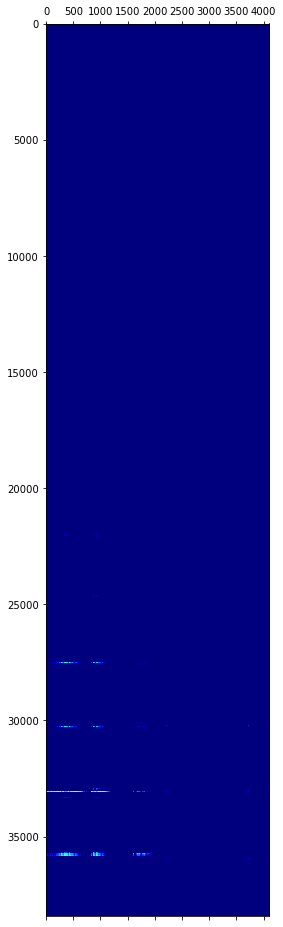

In [180]:
plt.matshow(h["X2_admm"], aspect="auto", cmap="jet")

In [ ]:
plt.plot(np.sum())

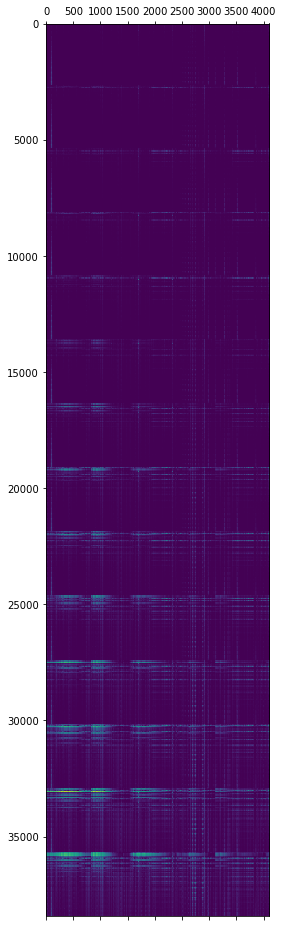

In [168]:
plt.matshow(flux_test, aspect="auto")

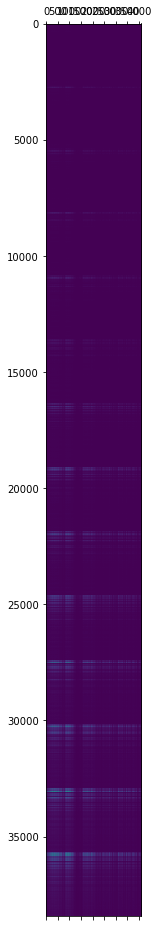

In [164]:
plt.matshow(h["X3_admm"])